In [2]:
import pandas as pd 
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
from collections import Counter
import seaborn as sns

## import my modules
import sys
sys.path.append("..\\modules")
import convert
import aggregation

In [29]:
path = "..\\..\\Roaming-Dogs-Data\\"
Xy_KS = gpd.read_file(path+"@Test_KS\\Variable.shp",encoding="big5")

print(Xy_KS.columns)

Index(['Market', 'COUNTYNAME', 'TOWNNAME', 'VILLNAME', 'VILLENG', 'COUNTYID',
       'COUNTYCODE', 'TOWNID', 'TOWNCODE', 'NOTE', 'Cluster', 'high_rat',
       'mid_rat', 'low_rat', 'high_edu', 'mid_edu', 'low_edu', 'Hospital_1',
       'Hospital_2', 'Hospital_3', 'Hospital_4', 'M_F_RAT', 'P_H_CNT', 'P_DEN',
       'DEPENDENCY', 'YOUN_DEP', 'OLD_DEP', 'AGING_IDX', 'H_CNT', 'P_CNT',
       'M_CNT', 'F_CNT', 'Ele', 'Ele_stu', 'Junior', 'Junior_stu', 'Senior',
       'Senior_stu', 'TaxPayer', 'Income_tot', 'Income_mea', 'Income_med',
       'Income_Q1', 'Income_Q3', 'Income_sta', 'Income_CV', 'Temple',
       'Train-stat', 'Train-crow', 'Hospital', 'Clinic', 'Area', 'country',
       'town', 'village', 'Nt', 'geometry'],
      dtype='object')


In [30]:
col_X = ['Market', 'Cluster', 'high_rat',
       'mid_rat', 'low_rat', 'M_F_RAT', 'P_H_CNT', 'P_DEN',
       'DEPENDENCY', 'YOUN_DEP', 'OLD_DEP', 'AGING_IDX', 'H_CNT', 'P_CNT',
       'M_CNT', 'F_CNT', 'Ele', 'Ele_stu', 'Junior', 'Junior_stu', 'Senior',
       'Senior_stu', 'TaxPayer', 'Income_tot', 'Income_mea', 'Income_med',
       'Income_Q1', 'Income_Q3', 'Income_sta', 'Income_CV', 'Temple',
       'Train-stat', 'Train-crow', 'Hospital', 'Clinic', 'Area', 'country',
       'town', 'village']

col_y = ['Nt']

<AxesSubplot:>

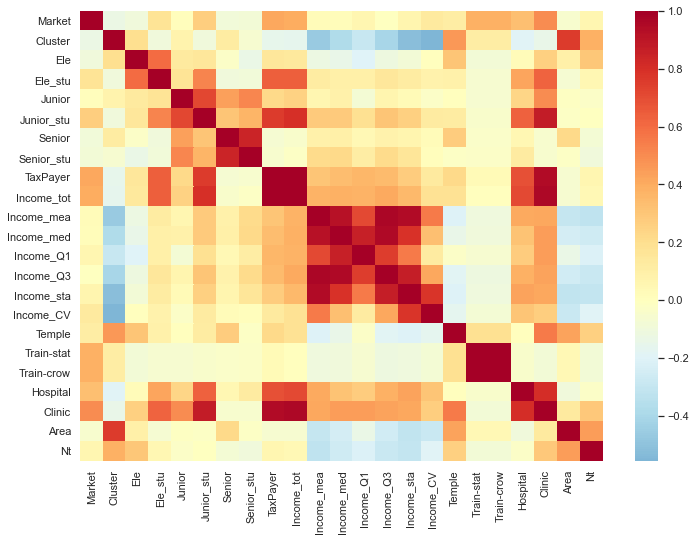

In [32]:
df_corr = Xy_KS[col_X+col_y].corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(df_corr, center=0, cmap ='RdYlBu_r' )

In [33]:
print(df_corr.Nt[abs(df_corr.Nt)>.3])
col_X_01 = df_corr.Nt[abs(df_corr.Nt)>.3].index
col_X_01 = col_X_01[:len(col_X_01)-1]

Cluster       0.382832
Income_mea   -0.322131
Income_sta   -0.308816
Area          0.453377
Nt            1.000000
Name: Nt, dtype: float64


### GLM_Poisson

In [13]:
import statsmodels.api as sm
import numpy as np

In [14]:
y = Xy_KS[col_y].values.reshape((-1, 1))
X = Xy_KS[col_X_01].values.reshape((-1, len(col_X_01)))
print(y.shape, X.shape)

(58, 1) (58, 8)


In [15]:
#First instantiate a GLM model object
model = sm.GLM(y, X, family=sm.families.Poisson()) #Set family to Poisson family object for Poisson GLM

#Then use the fit method to estimate coefficients and compute diagnostics
results = model.fit()

In [16]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   58
Model:                            GLM   Df Residuals:                       50
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -282.79
Date:                Tue, 29 Mar 2022   Deviance:                       350.73
Time:                        11:04:59   Pearson chi2:                     395.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0480      0.082      0.587      0.5

### GWR_Poisson

In [ ]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap

In [ ]:
g_y = Xy_KS[col_y].values.reshape((-1, 1))
g_X = Xy_KS[col_X].values.reshape((-1, len(col_X)))

In [ ]:
Xy_KS_geo = gpd.GeoDataFrame(data=Xy_KS,  geometry='geometry', crs = market.crs)

In [ ]:
coords = list(zip(Xy_KS.geometry.centroid.x, Xy_KS.geometry.centroid.y))

In [ ]:
%%time
gwr_selector = Sel_BW(coords, g_y, g_X,fixed=True, kernel = 'gaussian',family = Poisson())
gwr_bw = gwr_selector.search()


In [ ]:
print('GWR bandwidth =', gwr_bw)